# Installs and libraries

In [1]:
!pip install pyarrow
!pip install fastparquet

  Running setup.py clean for fastparquet
  Created wheel for thrift: filename=thrift-0.13.0-py3-none-any.whl size=154960 sha256=3a4ccff5ec56991307ee64c1aa34a4c44e6ae9c4e00bfa7982dc94cc49005b92
  Stored in directory: c:\users\dbira\appdata\local\pip\cache\wheels\79\35\5a\19f5dadf91f62bd783aaa8385f700de9bc14772e09ab0f006a
Successfully built thrift
Failed to build fastparquet
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\dbira\\AppData\\Local\\Temp\\pip-install-7qsga8j0\\fastparquet\\setup.py'"'"'; __file__='"'"'C:\\Users\\dbira\\AppData\\Local\\Temp\\pip-install-7qsga8j0\\fastparquet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\dbira\AppData\Local\Temp\pip-wheel-1ro7ddei'
       cwd: C:\Users\dbira\AppData\Local\Temp\pip-install-7qsga8j0\fastparquet\
  Complete output (45 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\fastparquet
  copying fastparquet\api.py -> build\lib.win-amd64-3.7\fastparquet
  copying fastparquet\compression.py -> build\lib.win-amd64-3.7\fastparquet
  copyi

In [2]:
!pip install --upgrade pandas

  Using cached pandas-1.2.1-cp37-cp37m-win_amd64.whl (9.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-1.0.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

# Data Import

In [4]:
users_df = pd.read_parquet("users.parquet", engine='auto')

In [5]:
users_df.head()

,advertising_id,country_code,platform,connectivity,locale,os_version,device_model
0,C7524E75-E5F8-4DB4-B1E8-5C67EA809432,BE,ios,WIFI,en_BE,12.1.2,"iPhone9,1"
1,BDDD7059-E8B6-434B-8E31-F068E59AA00C,US,android,LTE,en_US,26,SM-G965U
2,6140BF84-28DD-437E-A0F2-EDE783C041F5,MX,ios,LTE,en_MX,12.1.2,"iPhone10,5"
3,17B1BA1C-4B5E-428E-9813-C1C14F5FA415,TR,ios,HSDPA,en_TR,12.1.2,"iPhone10,5"
4,D15A6130-354A-442D-83E6-1EB37F1381BD,TR,ios,WIFI,en_TR,12.1.2,"iPhone10,6"


In [3]:
apps_df= pd.read_parquet("apps.parquet", engine='auto')

In [12]:
apps_df.iloc[10:20]

,name,bundleId,contentAdvisoryRating,userRatingCount,description,genres,averageUserRating
10,Flippy Floors,com.carpegame.flippyfloors,9+,6910.0,.Take control of the level's environment to gu...,[Games],4.5
11,Stretch!,com.plexonic.stretch,12+,6000.0,• Drive the bus from tower to tower\n• Hold yo...,[Games],4.5
12,MaxiGolf,com.pilgrimsgames.maxigolf,12+,2405.0,Swing as hard as you can and upgrade your stat...,"[Games, Sports, Arcade]",4.5
13,Bowling Street,com.pilgrimsgames.bowlingstreet,12+,1762.0,Throw your bowling ball as hard as you can and...,"[Games, Sports, Arcade]",4.5
14,Shoot! - Addictive Game,com.casualhitinc.shoot,12+,560.0,How to play:\n - shoot into pucks to collide e...,"[Games, Arcade]",4.5
15,Snaker.io !,com.XTechStudios.snakeIO,12+,548.0,The most addictive game!\n\nEnter the arena an...,[Games],4.5
16,Idle Balls,com.voodoo.idleballs,12+,18868.0,Scratch your multi-tasking itch!\n\nPlay Idle ...,"[Games, Simulation, Arcade]",4.5
17,Ball's Journey,com.maximephilipp.ballsjourney,12+,18027.0,Travel farther and farther while improving you...,"[Games, Arcade, Action]",4.5
18,Perfect Tower,com.hypnocatstudio.perfecttower,12+,16263.0,How about building a burger tower? Or a teddy ...,"[Games, Arcade, Adventure]",4.5
19,Planet Bomber!,com.paulaugustel.bomber,12+,15889.0,Explore the galaxy and destroy planets.\nUpgra...,"[Games, Simulation, Arcade]",4.5


In [13]:
apps_df.iloc[16].description

'Scratch your multi-tasking itch!\n\nPlay Idle Balls in front of your favorite show, in a boring class or meeting - without missing the important stuff.\n\n-Free to play\n-Endless gameplay and upgrades\n-No internet connection needed'

In [8]:
impressions_df = pd.read_parquet("impressions.parquet", engine='auto')

In [9]:
impressions_df.head()

,advertising_id,source_id
0,9F3CB24A-0576-46A0-8A96-851A0A99A4BF,com.h8games.falldown
1,65F9EE3A-2946-42F4-BFC2-801E69C6A3B6,com.h8games.falldown
2,71C13B95-FEBC-4F8A-B378-D6ABF9AD814E,com.h8games.falldown
3,A5FAFA27-BD71-49A4-A8B7-271CFEDE77E5,com.h8games.falldown
4,7D727E92-ED1E-4801-B0F1-1A1BEE8A422B,com.honikougames.royale.io


In [3]:
clicks_df = pd.read_parquet("clicks.parquet", engine='auto')

In [4]:
clicks_df.head()

,advertising_id,source_id
0,6442609A-C95C-459B-8E2D-67E4740EFA42,io.voodoo.paper2
1,2C243AB1-CE04-4A24-AC8E-D29128E078ED,com.neonplay.casualsoccerkick
2,6FB84B59-8E18-4F68-87DB-7A77181A7312,com.h8games.falldown
3,AD0B579E-D66E-4A47-81CA-5E4981851ACF,com.fullfat.bw
4,A930510C-B992-4D70-8241-FF241F0247AF,com.h8games.falldown


In [8]:
clicks_df.describe()

,advertising_id,source_id
count,10000,10000
unique,5007,51
top,FB9121B2-CC96-40CA-AFE8-D465BD791C38,com.h8games.falldown
freq,13,2532


In [12]:
installs_df = pd.read_parquet("installs.parquet", engine='auto')

In [13]:
installs_df.head()

,advertising_id,source_id
0,3FF59AB5-69F3-48BC-9EF4-EE9ADF742C4E,com.h8games.falldown
1,C064D67E-0D55-49B0-B80E-A2FB6937A6A7,com.h8games.falldown
2,83BA1435-DD14-4DBC-B4A6-7692C151EB46,com.h8games.falldown
3,50BB4545-FD96-49F9-A399-F1E056845A9F,com.h8games.falldown
4,5B31DE0D-701E-4B5E-A49D-3F17C2723DDF,io.voodoo.paper2


In [14]:
appopens_df = pd.read_parquet("appopens.parquet", engine='auto')

In [15]:
appopens_df.head()

,advertising_id,source_id
0,4E0171DE-4C93-4DF4-9BE6-8F46CF0B75EA,com.h8games.falldown
1,83638CA7-6C38-4828-B630-1C0263CF7456,com.h8games.falldown
2,1DFCA26B-8810-4140-97D4-C9D8C67EAB12,com.h8games.falldown
3,909B8363-97A1-4EF9-8CD1-8C771BC29A3B,com.itchmedia.mfp18
4,6C5CD7A7-46A1-4D62-9DCB-483CD1E7B0C0,com.h8games.falldown


# Data Description 
### Users :

In [16]:
users_df.head()

,advertising_id,country_code,platform,connectivity,locale,os_version,device_model
0,C7524E75-E5F8-4DB4-B1E8-5C67EA809432,BE,ios,WIFI,en_BE,12.1.2,"iPhone9,1"
1,BDDD7059-E8B6-434B-8E31-F068E59AA00C,US,android,LTE,en_US,26,SM-G965U
2,6140BF84-28DD-437E-A0F2-EDE783C041F5,MX,ios,LTE,en_MX,12.1.2,"iPhone10,5"
3,17B1BA1C-4B5E-428E-9813-C1C14F5FA415,TR,ios,HSDPA,en_TR,12.1.2,"iPhone10,5"
4,D15A6130-354A-442D-83E6-1EB37F1381BD,TR,ios,WIFI,en_TR,12.1.2,"iPhone10,6"


In [17]:
users_df.shape

(18633, 7)

In [18]:
users_df.isna().sum()

advertising_id    0
country_code      0
platform          0
connectivity      0
locale            0
os_version        0
device_model      0
dtype: int64

In [19]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18633 entries, 0 to 18632
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   advertising_id  18633 non-null  object
 1   country_code    18633 non-null  object
 2   platform        18633 non-null  object
 3   connectivity    18633 non-null  object
 4   locale          18633 non-null  object
 5   os_version      18633 non-null  object
 6   device_model    18633 non-null  object
dtypes: object(7)
memory usage: 1019.1+ KB


In [20]:
users_df.describe()

,advertising_id,country_code,platform,connectivity,locale,os_version,device_model
count,18633,18633,18633,18633,18633,18633,18633
unique,18371,151,2,13,429,50,288
top,97AE579C-4AE5-40FF-8C96-C95071F091F6,US,ios,WIFI,en_US,12.1.2,"iPhone9,3"
freq,3,2596,18152,13758,2840,11176,2598


In [21]:
users_df['platform'].value_counts()

ios        18152
android      481
Name: platform, dtype: int64

In [22]:
print("versions number for 'ios' = %d \nversions number for 'android' = %d \n " % (users_df[users_df['platform']=='ios']['os_version'].nunique(),users_df[users_df['platform']=='android']['os_version'].nunique()))

versions number for 'ios' = 41 
versions number for 'android' = 9 
 


In [23]:
n_users_country = users_df.country_code.value_counts()
for i in [1,10,50,100,500,1000]:
    print ("%d countries with more than %d users" % (n_users_country[n_users_country > i].count(),i))

125 countries with more than 1 users
81 countries with more than 10 users
43 countries with more than 50 users
31 countries with more than 100 users
12 countries with more than 500 users
4 countries with more than 1000 users


### Apps

In [24]:
apps_df.head()

,name,bundleId,contentAdvisoryRating,userRatingCount,description,genres,averageUserRating
0,Dunk Hit,com.standylan.dunkhit,12+,71595.0,"Get on fire in this hot, epic and bouncy baske...","[Games, Arcade, Sports]",4.5
1,Fire Rides,com.h8games.fireballcave,12+,68023.0,Exciting adventure of the magic fireball throu...,"[Games, Action]",4.5
2,Wind Rider!,com.aurelienvenard.windrider,12+,67345.0,Cross the city in wingsuit.\nClose the buildin...,"[Games, Action]",4.5
3,Go Plane,io.voodoo.goplane1,12+,58269.0,Let the missiles approach without touching you...,"[Games, Entertainment, Simulation, Arcade]",4.5
4,Fire Up!,io.voodoo.firedup,12+,54918.0,Fire out balls and break as many blocks as you...,"[Games, Entertainment, Action, Arcade]",4.5


In [25]:
apps_df.shape

(63, 7)

In [26]:
apps_df.isna().sum()

name                     0
bundleId                 0
contentAdvisoryRating    0
userRatingCount          0
description              0
genres                   0
averageUserRating        0
dtype: int64

In [27]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   63 non-null     object 
 1   bundleId               63 non-null     object 
 2   contentAdvisoryRating  63 non-null     object 
 3   userRatingCount        63 non-null     float64
 4   description            63 non-null     object 
 5   genres                 63 non-null     object 
 6   averageUserRating      63 non-null     float64
dtypes: float64(2), object(5)
memory usage: 3.6+ KB


In [28]:
apps_df.describe()

,userRatingCount,averageUserRating
count,6.300000e+01,63.000000
mean,1.142954e+05,4.492063
std,1.850267e+05,0.109694
min,1.900000e+01,4.000000
25%,1.844750e+04,4.500000
50%,4.154600e+04,4.500000
75%,1.253775e+05,4.500000
max,1.049147e+06,5.000000


In [29]:
genres = set()
for line in apps_df.genres :
    genres = genres.union(set(line))
print ("there are %d different genres of apps" % len(genres))

there are 14 different genres of apps


In [30]:
genres

{'Action',
 'Adventure',
 'Arcade',
 'Entertainment',
 'Family',
 'Games',
 'Puzzle',
 'Racing',
 'Simulation',
 'Social Networking',
 'Sports',
 'Strategy',
 'Trivia',
 'Word'}

In [31]:
apps_genres_df = apps_df.explode('genres') #requires pandas >= 0.25
apps_genres_df['genres'].value_counts()

Games                62
Arcade               44
Action               21
Entertainment        10
Sports               10
Simulation            9
Strategy              3
Adventure             3
Social Networking     1
Racing                1
Word                  1
Puzzle                1
Trivia                1
Family                1
Name: genres, dtype: int64

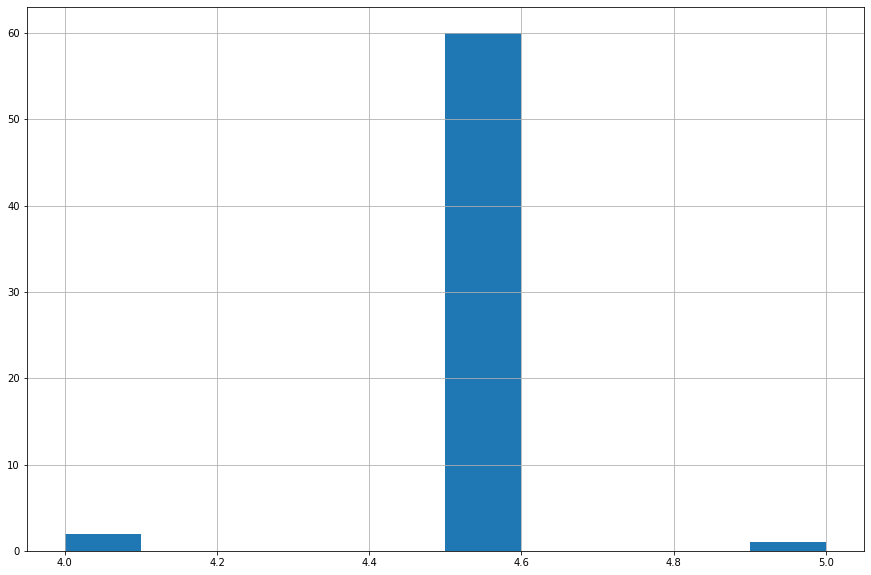

In [32]:
apps_df.averageUserRating.hist(figsize=(15, 10))

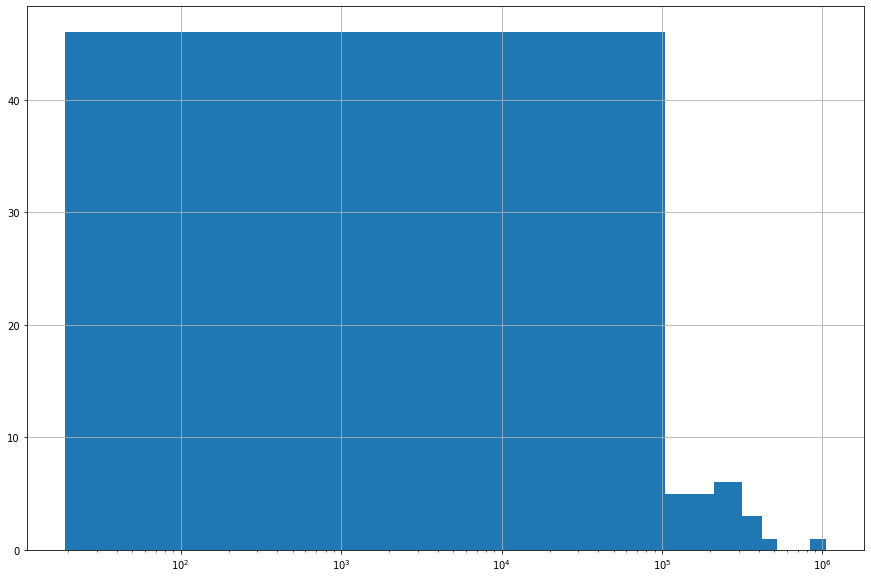

In [33]:
fig, ax = plt.subplots()
apps_df.userRatingCount.hist(figsize=(15, 10))
ax.set_xscale('log')

### Funnel 

In [34]:
impressions_df.head()

,advertising_id,source_id
0,9F3CB24A-0576-46A0-8A96-851A0A99A4BF,com.h8games.falldown
1,65F9EE3A-2946-42F4-BFC2-801E69C6A3B6,com.h8games.falldown
2,71C13B95-FEBC-4F8A-B378-D6ABF9AD814E,com.h8games.falldown
3,A5FAFA27-BD71-49A4-A8B7-271CFEDE77E5,com.h8games.falldown
4,7D727E92-ED1E-4801-B0F1-1A1BEE8A422B,com.honikougames.royale.io


In [35]:
impressions_df.isna().sum()

advertising_id    0
source_id         0
dtype: int64

In [36]:
print ("There are %d duplicates out of %d rows" % (impressions_df.shape[0]-impressions_df.drop_duplicates().shape[0],impressions_df.shape[0]))

There are 67103 duplicates out of 100000 rows


In [37]:
count_impressions_df = impressions_df.groupby(['advertising_id','source_id']).size().reset_index(name='count')
count_impressions_df.head()

,advertising_id,source_id,count
0,00062D9F-4AFE-4F82-B256-8DDD3E86CC68,com.acidcousins.fdunk,4
1,00062D9F-4AFE-4F82-B256-8DDD3E86CC68,com.h8games.falldown,4
2,000A6839-6E79-4914-87D1-3B98DE8A0E9B,com.h8games.falldown,10
3,000C20E3-04EE-4536-AA04-033409EA9B61,com.h8games.falldown,7
4,000D5B50-17FB-4E12-BA1F-9EC596F78CBA,com.h8games.falldown,8


In [38]:
print ("max count number = %d" % count_impressions_df['count'].max())

max count number = 19


===============================================================================================

In [39]:
clicks_df.head()

,advertising_id,source_id
0,6442609A-C95C-459B-8E2D-67E4740EFA42,io.voodoo.paper2
1,2C243AB1-CE04-4A24-AC8E-D29128E078ED,com.neonplay.casualsoccerkick
2,6FB84B59-8E18-4F68-87DB-7A77181A7312,com.h8games.falldown
3,AD0B579E-D66E-4A47-81CA-5E4981851ACF,com.fullfat.bw
4,A930510C-B992-4D70-8241-FF241F0247AF,com.h8games.falldown


In [40]:
clicks_df.isna().sum()

advertising_id    0
source_id         0
dtype: int64

In [41]:
print ("There are %d duplicates out of %d rows" % (clicks_df.shape[0]-clicks_df.drop_duplicates().shape[0],clicks_df.shape[0]))

There are 3225 duplicates out of 10000 rows


In [42]:
count_clicks_df = clicks_df.groupby(['advertising_id','source_id']).size().reset_index(name='count')
count_clicks_df.head()

,advertising_id,source_id,count
0,0010169C-682F-4B20-B2AD-ADD029434234,com.fullfat.bw,1
1,001C0FAB-D74D-41E7-A0F3-E825D33195E3,com.nomonkeys.ball-blast,3
2,001F7A0B-07BF-4171-90A8-F35F23A5E6BE,com.h8games.falldown,1
3,002F6F94-DCBC-4DE9-8B8A-5D6D6154D79F,com.ohmgames.chambouletout,1
4,00383447-C601-4233-9B4A-EE437EB32C57,com.bigframes.colorroad,1


In [43]:
print ("max count number = %d" % count_clicks_df['count'].max())

max count number = 8


=========================================================================================================

In [44]:
installs_df.head()

,advertising_id,source_id
0,3FF59AB5-69F3-48BC-9EF4-EE9ADF742C4E,com.h8games.falldown
1,C064D67E-0D55-49B0-B80E-A2FB6937A6A7,com.h8games.falldown
2,83BA1435-DD14-4DBC-B4A6-7692C151EB46,com.h8games.falldown
3,50BB4545-FD96-49F9-A399-F1E056845A9F,com.h8games.falldown
4,5B31DE0D-701E-4B5E-A49D-3F17C2723DDF,io.voodoo.paper2


In [45]:
installs_df.isna().sum()

advertising_id    0
source_id         0
dtype: int64

In [46]:
print ("There are %d duplicates out of %d rows" % (installs_df.shape[0]-installs_df.drop_duplicates().shape[0],installs_df.shape[0]))

There are 28 duplicates out of 1000 rows


In [47]:
count_installs_df = installs_df.groupby(['advertising_id','source_id']).size().reset_index(name='count')
count_installs_df.head()

,advertising_id,source_id,count
0,000688D3-5AA3-41F6-AD79-292D4939F061,com.h8games.falldown,1
1,00577C39-8C5F-40BC-A8AB-979BA8CFB79B,com.build.succeeded.radial,1
2,00D876A8-8A59-42D6-BDE6-EA3F5718AE21,com.h8games.falldown,1
3,0175DB2D-4CCE-4C53-BFDB-D549664317E7,com.bigframes.colorroad,1
4,0193AA3E-BB35-47AA-9F46-135730585953,com.ohmgames.chambouletout,1


In [48]:
print ("max count number = %d" % count_installs_df['count'].max())

max count number = 3


=========================================================================================================

In [49]:
appopens_df.head()

,advertising_id,source_id
0,4E0171DE-4C93-4DF4-9BE6-8F46CF0B75EA,com.h8games.falldown
1,83638CA7-6C38-4828-B630-1C0263CF7456,com.h8games.falldown
2,1DFCA26B-8810-4140-97D4-C9D8C67EAB12,com.h8games.falldown
3,909B8363-97A1-4EF9-8CD1-8C771BC29A3B,com.itchmedia.mfp18
4,6C5CD7A7-46A1-4D62-9DCB-483CD1E7B0C0,com.h8games.falldown


In [50]:
appopens_df.isna().sum()

advertising_id    0
source_id         0
dtype: int64

In [51]:
print ("There are %d duplicates out of %d rows" % (appopens_df.shape[0]-appopens_df.drop_duplicates().shape[0],appopens_df.shape[0]))

There are 173951 duplicates out of 200000 rows


In [52]:
count_appopens_df = appopens_df.groupby(['advertising_id','source_id']).size().reset_index(name='count')
count_appopens_df.head()

,advertising_id,source_id,count
0,00077C68-6022-41F5-9419-BAAE4410B7BF,com.ohmgames.chambouletout,4
1,000CAFCD-3581-46B1-BC8B-74A87BFEC884,com.bentostudio.ballsvsblocks,2
2,000CAFCD-3581-46B1-BC8B-74A87BFEC884,com.h8games.falldown,43
3,000CAFCD-3581-46B1-BC8B-74A87BFEC884,com.itchmedia.mfp18,7
4,001704B2-436C-49DE-BF15-85FBFA7BB756,io.voodoo.paper2,1


In [53]:
print ("max count number = %d" % count_appopens_df['count'].max())

max count number = 70


=========================================================================================================

In [54]:
check = all(user in list(count_installs_df.advertising_id) for user in list(count_appopens_df.advertising_id))
if check :
    print ('All appopens users in installs')
else :
    print ('NOT all appopens users in installs')
check = all(user in list(count_clicks_df.advertising_id) for user in list(count_installs_df.advertising_id))
if check :
    print ('All installs users in clicks')
else :
    print ('NOT all installs users in clicks')
check = all(user in list(count_impressions_df.advertising_id) for user in list(count_clicks_df.advertising_id))
if check :
    print ('All clicks users in impressions')
else :
    print ('NOT all clicks users in impressions')
check = all(user in list(users_df.advertising_id) for user in list(count_appopens_df.advertising_id))
if check :
    print ('All appopens users in all users')
else :
    print ('NOT all appopens users in all users')
check = all(user in list(users_df.advertising_id) for user in list(count_installs_df.advertising_id))
if check :
    print ('All installs users in all users')
else :
    print ('NOT all installs users in all users')
check = all(user in list(users_df.advertising_id) for user in list(count_clicks_df.advertising_id))
if check :
    print ('All clicks users in all users')
else :
    print ('NOT all clicks users in all users')
check = all(user in list(users_df.advertising_id) for user in list(count_impressions_df.advertising_id))
if check :
    print ('All impressions users in all users')
else :
    print ('NOT all impressions users in all users')

NOT all appopens users in installs
NOT all installs users in clicks
NOT all clicks users in impressions
NOT all appopens users in all users
NOT all installs users in all users
NOT all clicks users in all users
NOT all impressions users in all users


# Collaborative Filtring
## DataSets as App-User Matrix preperation 
### impressions

In [55]:
impressions_matrix = count_impressions_df.pivot_table(values='count', index=['advertising_id'], columns ='source_id')
impressions_matrix.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,com.wildbeep.stoneskimming,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
00062D9F-4AFE-4F82-B256-8DDD3E86CC68,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000A6839-6E79-4914-87D1-3B98DE8A0E9B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000C20E3-04EE-4536-AA04-033409EA9B61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000D5B50-17FB-4E12-BA1F-9EC596F78CBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0018B95A-716F-4EC3-ACA3-6254699C5779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
impressions_matrix.notnull().sum(axis=1).unique()

array([ 2,  1,  3,  4,  5,  6, 10, 12,  7,  8, 17, 15, 14,  9, 11, 19, 13],
      dtype=int64)

No rows with only NaN values

In [57]:
impressions_matrix = impressions_matrix.fillna(0)
impressions_matrix.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,com.wildbeep.stoneskimming,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
00062D9F-4AFE-4F82-B256-8DDD3E86CC68,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000A6839-6E79-4914-87D1-3B98DE8A0E9B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000C20E3-04EE-4536-AA04-033409EA9B61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000D5B50-17FB-4E12-BA1F-9EC596F78CBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0018B95A-716F-4EC3-ACA3-6254699C5779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### clicks 

In [58]:
clicks_matrix = count_clicks_df.pivot_table(values='count', index=['advertising_id'], columns ='source_id')
clicks_matrix.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,com.wildbeep.stoneskimming,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
0010169C-682F-4B20-B2AD-ADD029434234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001C0FAB-D74D-41E7-A0F3-E825D33195E3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001F7A0B-07BF-4171-90A8-F35F23A5E6BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002F6F94-DCBC-4DE9-8B8A-5D6D6154D79F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00383447-C601-4233-9B4A-EE437EB32C57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
clicks_matrix.notnull().sum(axis=1).unique()

array([ 1,  3,  6,  2,  5,  4,  7,  8, 10], dtype=int64)

No rows with only NaN values

In [60]:
clicks_matrix = clicks_matrix.fillna(0)
clicks_matrix.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,com.wildbeep.stoneskimming,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
0010169C-682F-4B20-B2AD-ADD029434234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001C0FAB-D74D-41E7-A0F3-E825D33195E3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001F7A0B-07BF-4171-90A8-F35F23A5E6BE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002F6F94-DCBC-4DE9-8B8A-5D6D6154D79F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00383447-C601-4233-9B4A-EE437EB32C57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### installs

In [61]:
installs_matrix = count_installs_df.pivot_table(values='count', index=['advertising_id'], columns ='source_id')
installs_matrix.head()

source_id,com.acidcousins.fdunk,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,com.carpegame.flippyfloors,com.cassette.bounceforeverc,...,com.standylan.dunkhit,com.voodoo.idleballs,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
000688D3-5AA3-41F6-AD79-292D4939F061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00577C39-8C5F-40BC-A8AB-979BA8CFB79B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00D876A8-8A59-42D6-BDE6-EA3F5718AE21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0175DB2D-4CCE-4C53-BFDB-D549664317E7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0193AA3E-BB35-47AA-9F46-135730585953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
installs_matrix.notnull().sum(axis=1).unique()

array([1, 2, 3], dtype=int64)

No rows with only NaN values

In [63]:
installs_matrix = installs_matrix.fillna(0)
installs_matrix.head()

source_id,com.acidcousins.fdunk,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,com.carpegame.flippyfloors,com.cassette.bounceforeverc,...,com.standylan.dunkhit,com.voodoo.idleballs,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
000688D3-5AA3-41F6-AD79-292D4939F061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00577C39-8C5F-40BC-A8AB-979BA8CFB79B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00D876A8-8A59-42D6-BDE6-EA3F5718AE21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0175DB2D-4CCE-4C53-BFDB-D549664317E7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0193AA3E-BB35-47AA-9F46-135730585953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### appopens

In [64]:
appopens_matrix = count_appopens_df.pivot_table(values='count', index=['advertising_id'], columns ='source_id')
appopens_matrix.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,com.wildbeep.stoneskimming,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
00077C68-6022-41F5-9419-BAAE4410B7BF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000CAFCD-3581-46B1-BC8B-74A87BFEC884,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001704B2-436C-49DE-BF15-85FBFA7BB756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
001EC8E6-C179-4F73-8807-5A9F0A04158C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
0020DFD0-8EDB-477F-B4AE-D70A63E33740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
appopens_matrix.notnull().sum(axis=1).unique()

array([ 1,  3,  2,  4,  5,  7,  6, 11,  8, 12, 19,  9, 17, 10, 18, 14, 16,
       13, 15, 25, 20, 29, 28, 27, 21, 24, 23], dtype=int64)

No rows with only NaN values

In [66]:
appopens_matrix = appopens_matrix.fillna(0)
appopens_matrix.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,com.wildbeep.stoneskimming,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball
advertising_id,,,,,,,,,,,,,,,,,,,,,
00077C68-6022-41F5-9419-BAAE4410B7BF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000CAFCD-3581-46B1-BC8B-74A87BFEC884,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001704B2-436C-49DE-BF15-85FBFA7BB756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
001EC8E6-C179-4F73-8807-5A9F0A04158C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
0020DFD0-8EDB-477F-B4AE-D70A63E33740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Next Steps : 
    * determine similarities between users // Clustering
    * given that, predict values for apps // moyenne sur le cluster
    * find a way to measure the accuracy of prediction

## known users data in matrix ( more feature engineering)

In [67]:
print ("from %d impression users we have data on %d user" % (len(impressions_matrix.index),len(set(users_df.advertising_id).intersection(set(impressions_matrix.index)))))
print ("from %d clicks users we have data on %d user" % (len(clicks_matrix.index),len(set(users_df.advertising_id).intersection(set(clicks_matrix.index)))))
print ("from %d installs users we have data on %d user" % (len(installs_matrix.index),len(set(users_df.advertising_id).intersection(set(installs_matrix.index)))))
print ("from %d appopens users we have data on %d user" % (len(appopens_matrix.index),len(set(users_df.advertising_id).intersection(set(appopens_matrix.index)))))

from 19470 impression users we have data on 342 user
from 5007 clicks users we have data on 23 user
from 957 installs users we have data on 19 user
from 11342 appopens users we have data on 50 user


In [68]:
len(impressions_matrix.index)

19470

In [69]:
len(set(users_df.advertising_id).intersection(set(impressions_matrix.index)))

342

In [70]:
impressions_users = impressions_matrix.loc[list(set(users_df.advertising_id).intersection(set(impressions_matrix.index)))]
clicks_users = clicks_matrix.loc[list(set(users_df.advertising_id).intersection(set(clicks_matrix.index)))]
installs_users = installs_matrix.loc[list(set(users_df.advertising_id).intersection(set(installs_matrix.index)))]
appopens_users = appopens_matrix.loc[list(set(users_df.advertising_id).intersection(set(appopens_matrix.index)))]

## construire un rating matrix
differents weights for impressions / clicks / installs / opens

In [71]:
def normalize(df):
    return df.apply(lambda x: (x*10)/max(df.max()))

In [72]:
impressions_users_norm = normalize(impressions_users)
clicks_users_norm = normalize(clicks_users)
installs_users_norm = normalize(installs_users)
appopens_users_norm = normalize(appopens_users)

In [73]:
rating_data = impressions_users_norm
coef = 2
for df in [clicks_users_norm,installs_users_norm,appopens_users_norm]:
    for col in (set(df.columns)-set(rating_data.columns)):
        rating_data[col] = 0
    for row in (set(df.index)-set(rating_data.index)):
        rating_data.loc[row] = 0
    for row in (set(rating_data.index).intersection(set(df.index))):
        rating_data[list(set(rating_data.columns).intersection(set(df.columns)))].loc[row] = rating_data[list(set(rating_data.columns).intersection(set(df.columns)))].loc[row] + df.loc[row] + coef * 10
    coef = coef + 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [74]:
rating_data.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball,com.pilgrimsgames.maxigolf
advertising_id,,,,,,,,,,,,,,,,,,,,,
611B28F1-53A2-47AC-9FD0-3DCA1BEE54C6,0.0,1.428571,0.0,0.000000,0.0,0.0,2.142857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5FC64177-B340-4711-8606-5E5A7DB0B07F,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8C2A4346-D0FE-4C9E-8C2C-1D6B93836D2C,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
CE96914A-8C8A-4AD3-A585-7CA46DE76307,0.0,0.000000,0.0,2.857143,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A82AC3A0-D945-4136-86CB-2096B9B0BB3A,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## adding dummies columns for countries and devices of users

In [75]:
users_clustering_df = users_df.set_index('advertising_id')
users_clustering_df = users_clustering_df.loc[list(rating_data.index)]
users_clustering_df = users_clustering_df[~users_clustering_df.index.duplicated(keep='first')]
users_clustering_df = users_clustering_df[['country_code','device_model']]

In [76]:
users_clustering_df.shape

(429, 2)

In [77]:
rating_user_data = pd.concat([rating_data, pd.get_dummies(users_clustering_df)], axis=1, join='inner')

In [78]:
rating_user_data.shape

(429, 150)

In [79]:
rating_user_data.head()

,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,"device_model_iPhone7,1","device_model_iPhone7,2","device_model_iPhone8,1","device_model_iPhone8,2","device_model_iPhone8,4","device_model_iPhone9,1","device_model_iPhone9,2","device_model_iPhone9,3","device_model_iPhone9,4","device_model_iPod7,1"
advertising_id,,,,,,,,,,,,,,,,,,,,,
611B28F1-53A2-47AC-9FD0-3DCA1BEE54C6,0.0,1.428571,0.0,0.000000,0.0,0.0,2.142857,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5FC64177-B340-4711-8606-5E5A7DB0B07F,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8C2A4346-D0FE-4C9E-8C2C-1D6B93836D2C,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
CE96914A-8C8A-4AD3-A585-7CA46DE76307,0.0,0.000000,0.0,2.857143,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
A82AC3A0-D945-4136-86CB-2096B9B0BB3A,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [80]:
X_train, X_test = train_test_split(rating_user_data, test_size=0.2, random_state=42)

In [81]:
X_train.shape

(343, 150)

In [82]:
X_test.shape

(86, 150)

## Clustering of users

In [83]:
mms = MinMaxScaler()
mms.fit(X_train)
data_transformed = mms.transform(X_train)
data_transformed_test = mms.transform(X_test)

In [84]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

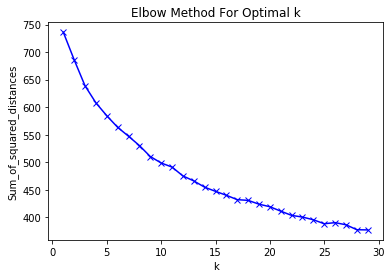

In [85]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Méthode du coude : 
- Plusieurs coudes dans le graph, on choisit le plus grand nombre de clusters possibles afin d'avoir plus similarité entre les utilisateurs (petit groupes d'utilisateurs)
- on prend k = 27

In [86]:
K = 27
km = KMeans(n_clusters=k)
km = km.fit(data_transformed)

## Recommandation function
- adding cluster column to ratings
- predicting rating by average over cluster members
- define a threshold 

In [87]:
rating_data_train = rating_data.loc[X_train.index]
rating_data_test = rating_data.loc[X_test.index]

In [88]:
rating_data_train['cluster'] = km.predict(data_transformed)

In [89]:
rating_data_by_cluster_train = rating_data_train.groupby('cluster').mean()

In [90]:
rating_data_by_cluster_train.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,io.voodoo.crowdcity,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball,com.pilgrimsgames.maxigolf
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.0,0.357143,0.0,0.000000,0.476190,0.178571,0.0,0.0,...,0.0,0.119048,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
1,0.0,0.129870,0.0,0.162338,0.0,0.000000,0.064935,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.032468,0.0,0.0,0.000000,0
2,0.0,0.000000,0.0,0.000000,0.0,0.095238,0.047619,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.190476,0.0,0.0,0.000000,0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.028571,0.085714,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.228571,0.0,0.0,0.000000,0
4,0.0,0.952381,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.119048,0.0,0.0,0.119048,0


In [91]:
rating_data_train.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball,com.pilgrimsgames.maxigolf,cluster
advertising_id,,,,,,,,,,,,,,,,,,,,,
F2D07944-E771-4482-B16E-72D0187E750E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7
03204274-204C-4C4E-80AC-EC845F6F2544,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15
62815FB5-D0E0-4A93-938A-602F5E093968,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15
5350CC51-DBAE-4367-8804-1F02A4747B61,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21
D936EA13-753C-45A9-BD53-C49861DDE64A,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,28


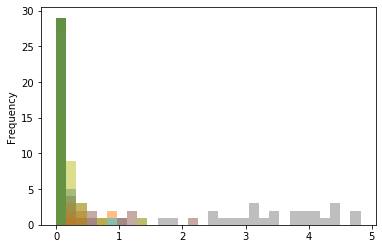

In [92]:
rating_data_by_cluster_train.plot.hist(bins= 30, alpha=0.5, legend = False)

In [93]:
rating_data_test['cluster'] = km.predict(data_transformed_test)

def recommand(app, user):
    seuil = 0.2
    pred_rate = rating_data_by_cluster_train[app].loc[rating_data_test['cluster'].loc[user]]
    return (pred_rate>seuil)

In [94]:
rating_data_test.head()

source_id,com.1button.golf,com.acidcousins.fdunk,com.adc.idleflipper,com.appadvisory.booooing,com.aurelienvenard.windrider,com.bdj.vortex,com.bentostudio.ballsvsblocks,com.bigframes.colorroad,com.btstudios.2048solitaire,com.build.succeeded.radial,...,io.voodoo.dune,io.voodoo.firedup,io.voodoo.fishmaster,io.voodoo.goplane1,io.voodoo.paper2,io.voodoo.paperio,io.voodoo.rockofdestruction,sk.phx.skeeball,com.pilgrimsgames.maxigolf,cluster
advertising_id,,,,,,,,,,,,,,,,,,,,,
13882650-4E13-4694-AF1C-FA052585AB67,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,3
6E3142F5-43C2-4952-849E-10C551169763,0.0,0.0,0.0,2.857143,0.0,0.0,0.0,0.0,0.0,0.0,...,1.428571,0.0,0.0,0.0,0.0,0.0,0.714286,0.0,0,13
E4CD2AD9-787B-4596-9D1E-D846E18741BD,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,27
BDFE115C-DB93-47A0-B8F5-C5255BAD0CD0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,20
1AB849A7-2E2D-4500-9A94-A93C8BA4AE9C,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,13


In [96]:
app = 'com.appadvisory.booooing'
user = '6E3142F5-43C2-4952-849E-10C551169763'
recommand(app,user)

False

In [97]:
max(rating_data_test.max())

28.0

In [98]:
cols = rating_data_test.columns
bt = rating_data_test.apply(lambda x: x > 0)
good_ads = bt.apply(lambda x: list(cols[x.values]), axis=1)

In [99]:
good_ads.head()

advertising_id
13882650-4E13-4694-AF1C-FA052585AB67                                            [cluster]
6E3142F5-43C2-4952-849E-10C551169763    [com.appadvisory.booooing, com.cassette.bounce...
E4CD2AD9-787B-4596-9D1E-D846E18741BD                [com.ohmgames.chambouletout, cluster]
BDFE115C-DB93-47A0-B8F5-C5255BAD0CD0                      [com.h8games.falldown, cluster]
1AB849A7-2E2D-4500-9A94-A93C8BA4AE9C                                            [cluster]
dtype: object

In [100]:
predictions=[]
for i in range(len(good_ads)):
    user = good_ads.index[i]
    for app in good_ads.iloc[i]:
        if app != 'cluster':
            predictions.append(recommand(app,user))

In [101]:
sum(predictions)/len(predictions)

0.6090909090909091

#### Next Steps
* définir une méthode d'évaluation des modèles 
* content based filtering